<a href="https://colab.research.google.com/github/stemgene/Engine-RPM-Profile-Detection/blob/master/Data_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 1. Data

### 1.1 General table

In [36]:
data = '/gdrive/My Drive/UR/DSC483/data/raw/rpm_profile/trip_data_for_rpm_profile_detection.csv'
df = pd.read_csv(data)
del df['Unnamed: 0']
print(df.shape)
df.head()
#df.loc[df.platformId==10322073]

(2038, 22)


,platformId,fleet,missionReportId,startTime,startTimeGMT,endTime,endTimeGMT,totalDistanceMiles,totalFuelUsedGals,fuelEfficiencyMpg,vehicleMake,vehicleModel,vehicleYear,engineMake,engineModel,engineYear,engineHorsepower,engineTorque,LowRPM,HighRPM,MaxRPM,engineSpeedControlScore
0,211077,Terp,11763901,1569841347377,2019-09-30 11:02:27.377,1569842789157,2019-09-30 11:26:29.157,0.000000,0.260693,0.000000,KENWORTH,T800,2002,Caterpillar,C12,2002.0,430,1650,1200.0,1600.0,2100.0,0.0
1,211077,Terp,11764353,1569843498377,2019-09-30 11:38:18.377,1569845180004,2019-09-30 12:06:20.003,19.963653,2.754709,7.244305,KENWORTH,T800,2002,Caterpillar,C12,2002.0,430,1650,1200.0,1600.0,2100.0,90.0
2,211077,Terp,11764354,1569845515377,2019-09-30 12:11:55.377,1569845972410,2019-09-30 12:19:32.410,0.529983,0.119015,4.367627,KENWORTH,T800,2002,Caterpillar,C12,2002.0,430,1650,1200.0,1600.0,2100.0,100.0
3,211077,Terp,11764355,1569846380377,2019-09-30 12:26:20.377,1569846507224,2019-09-30 12:28:27.223,0.000000,0.017180,0.000000,KENWORTH,T800,2002,Caterpillar,C12,2002.0,430,1650,1200.0,1600.0,2100.0,0.0
4,211077,Terp,11764891,1569848443377,2019-09-30 13:00:43.377,1569852702474,2019-09-30 14:11:42.473,48.889078,9.776789,4.998345,KENWORTH,T800,2002,Caterpillar,C12,2002.0,430,1650,1200.0,1600.0,2100.0,77.0


In [0]:
platform = 10322073
trips = df[(df.platformId == platform) & (df.totalDistanceMiles > 10)]
print("For the platform of {}, there are {} trips.".format(platform, len(trips)))

For the platform of 10322073, there are 36 trips.


### 1.2 Individual platform table

In [0]:
platform = 10322073
rawdata = f'/gdrive/My Drive/UR/DSC483/data/raw/rpm_profile/{platform}_raw_port_data_for_all_trips.csv'
raw = pd.read_csv(rawdata)
del raw['Unnamed: 0']
print("There are {} records".format(len(raw)))
raw.head()

There are 1413610 records


,time,actual_torque_percent-513,demand_torque_percent-512,engine_rpm-190,reference_torque-544,wheel_speed-84
0,2019-09-29 00:10:22.331,NaN,NaN,NaN,NaN,55.996094
1,2019-09-29 00:10:22.438,NaN,NaN,1163.875,NaN,NaN
2,2019-09-29 00:10:22.489,NaN,NaN,1151.500,NaN,NaN
3,2019-09-29 00:10:22.759,NaN,NaN,1164.250,NaN,NaN
4,2019-09-29 00:10:22.808,NaN,NaN,1153.250,NaN,NaN


### 1.3 Visualization

#### 1.3.1 For a specific trip

In [0]:
def dots_plot(x, y):

  fig, ax = plt.subplots(figsize=(20,10))

  ax.scatter(x, y, c='blue', label=y.name, alpha=0.2)

  ax.legend()
  ax.grid(True)

  ax.set_title(f'Torque vs RPM for platformId {platform} and missionReportId {mission}')
  ax.set_xlabel('Engine RPM')
  ax.set_ylabel('Torque %')

  plt.show()

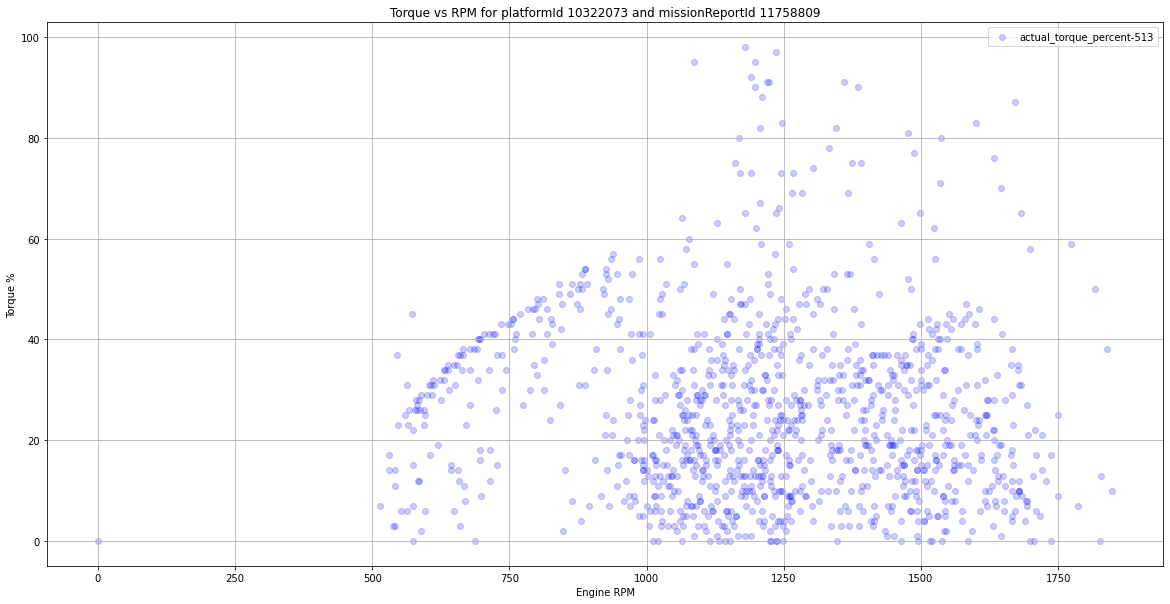

In [0]:
mission = 11758809
cols_keep = ['time','actual_torque_percent-513', 'engine_rpm-190']
start = trips[trips.missionReportId == mission].startTimeGMT.iloc[0]
end = trips[trips.missionReportId == mission].endTimeGMT.iloc[0]
trip_data = raw[(raw.time >= start) & (raw.time <= end)][cols_keep]
trip_data = trip_data.copy().dropna()
dots_plot(trip_data['engine_rpm-190'], trip_data['actual_torque_percent-513'])

#### 1.3.2 For a platform grouped all trips

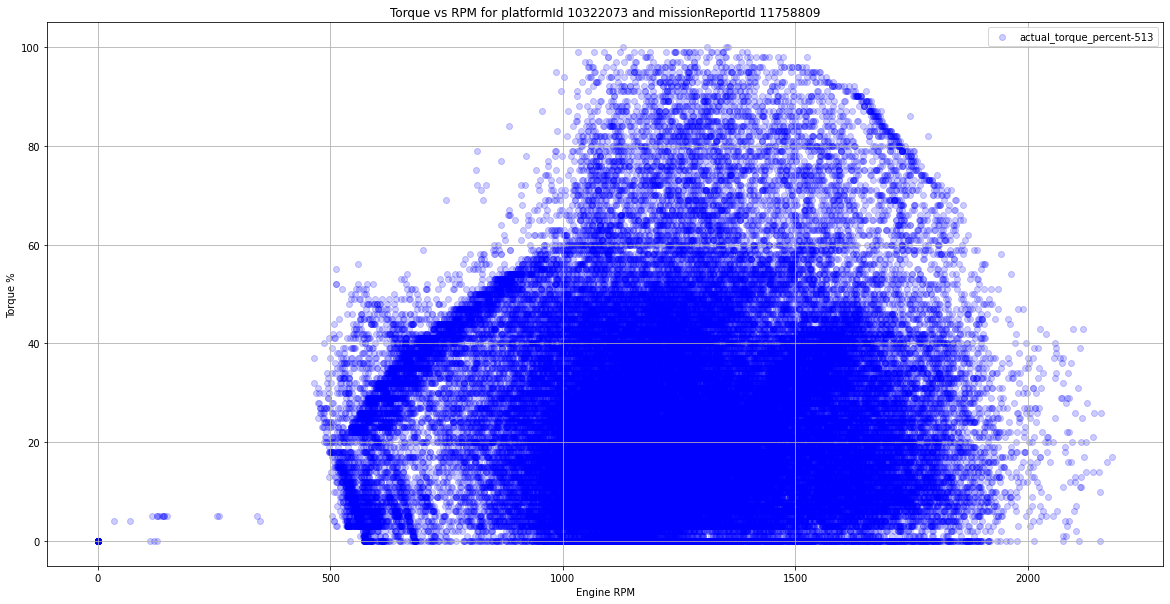

In [0]:
dots_plot(raw['engine_rpm-190'], raw['actual_torque_percent-513'])